# Drawing Conclusions
Use the space below to address questions on datasets `clean_08.csv` and `clean_18.csv`. You should've created these data files in the previous section: *Fixing Data Types Pt 3*.

In [33]:
# load datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

df_08 = pd.read_csv('clean_08.csv')
df_18 = pd.read_csv('clean_18.csv')
df_18.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No


### Q1: Are more unique models using alternative sources of fuel? By how much?

In [2]:
df_08.fuel.value_counts()

Gasoline    984
CNG           1
ethanol       1
gas           1
Name: fuel, dtype: int64

In [3]:
alt_08 = df_08.query('fuel in ["CNG", "ethanol"]').model.count()
alt_08

2

In [4]:
df_18.fuel.value_counts()

Gasoline       749
Gas             26
Ethanol         26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

In [5]:
alt_18 = df_18.query('fuel in ["Ethanol", "Electricity"]').model.nunique()
alt_18

26

<Container object of 2 artists>

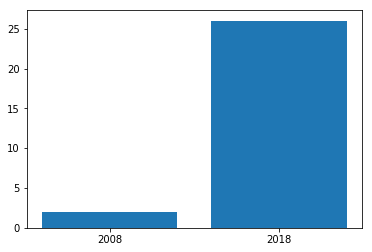

In [6]:
plt.bar([1,2], [alt_08, alt_18], tick_label= [2008,2018])

Text(0.5,1,'Proportion of models used alternative')

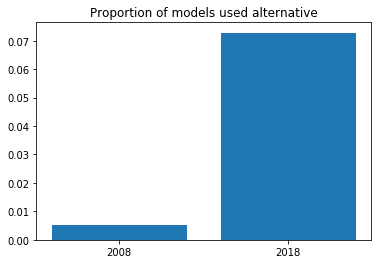

In [69]:
pro_08 = alt_08 / df_08.model.nunique()
pro_18 = alt_18 / df_18.model.nunique()
plt.bar([1,2], [pro_08, pro_18], tick_label= ['2008', '2018'])
plt.title('Proportion of models used alternative')

### Q2: How much have vehicle classes improved in fuel economy?  

In [70]:
veh_class_08 = df_08.groupby('veh_class').cmb_mpg.mean()
veh_class_08

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [71]:
veh_class_18 = df_18.groupby('veh_class').cmb_mpg.mean()
veh_class_18

veh_class
large car          23.409091
midsize car        27.884058
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64

In [73]:
fuel_improve = veh_class_18 - veh_class_08
type(fuel_improve)

pandas.core.series.Series

In [74]:
fuel_improve.dropna(inplace = True)
type(fuel_improve)

pandas.core.series.Series

veh_class
large car        23.409091
midsize car      27.884058
minivan          20.800000
pickup           18.589744
small car        25.421053
station wagon    27.529412
Name: cmb_mpg, dtype: float64

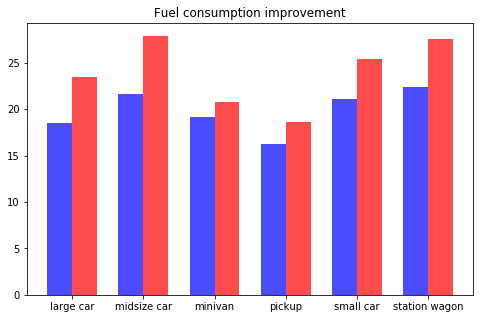

In [216]:
new_class_08 = veh_class_08.loc[fuel_improve.index]
new_class_18 = veh_class_18.loc[fuel_improve.index]
ind = np.arange(len(new_class_08))
width = 0.35
plt.subplots(figsize=(8,5))
plt.title('Fuel consumption improvement')
bar_08 = plt.bar(fuel_improve.index, new_class_08, 0.35, alpha=0.7, color='b', label = '2008')
bar_18 = plt.bar(ind+width, new_class_18, .35, alpha=0.7, color='r', label = '2018')
plt.xticks(ind+width/2, fuel_improve.index)
new_class_18

### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

([<matplotlib.axis.XTick at 0x7fdf46d26b70>,
 <a list of 4 Text xticklabel objects>)

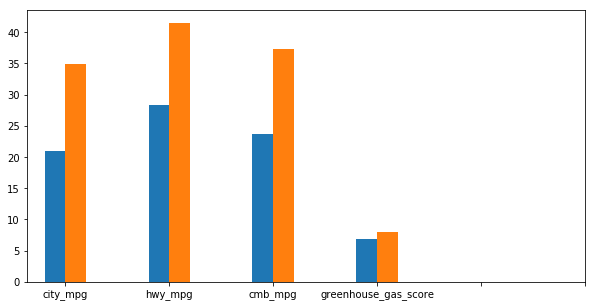

In [263]:
smart_08 = df_08.query('smartway == "yes" ').describe()['mean':'mean']
smart_18 = df_18.query('smartway in ["Yes", "Elite"]').describe()['mean': 'mean']
smart_08.drop(labels=['displ', 'cyl', 'air_pollution_score'],axis=1, inplace=True)
smart_18.drop(labels=['displ', 'cyl', 'air_pollution_score'],axis=1, inplace=True)

data1 = smart_08.transpose().iloc[:,:]
data2 = smart_18.transpose().iloc[:,:]

ind1 = np.arange(len(data1))
plt.subplots(figsize= [10,5])
fin_08 = plt.bar(ind1, data1['mean'],0.2)
fin_18 = plt.bar(ind1+0.2, data2['mean'],0.2)
plt.xticks(ind+0.2/2,data1.index)



### Q4: What features are associated with better fuel economy?

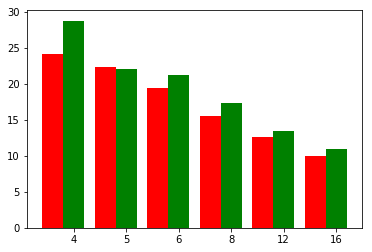

In [300]:
cyl_08 = df_08.groupby('cyl').cmb_mpg.mean()
cyl_18 = df_18.groupby('cyl').cmb_mpg.mean()
cyl_consum = cyl_18-cyl_08
cyl_consum.dropna(inplace=True)
cyl_08 = cyl_08.loc[cyl_consum.index]
cyl_18 = cyl_18.loc[cyl_consum.index]
ind2 = np.arange(len(cyl_consum))
cyl_08_bar = plt.bar(ind2, cyl_08, 0.4,color='r')
cyl_18_bar = plt.bar(ind2+0.4, cyl_18,0.4,color='g', tick_label = cyl_consum.index)

## Last Question: Q5

In [ ]:
model_08 = df_08.model.unique()
model_18 = df_18.model.unique()
same = [i for i in model_08 if i in model_18]
len(same)
model_08 = df_08.query('model in {}'.format(same))
model_18 = df_18.query('model in {}'.format(same))
